# **Waste Material Segregation for Improving Waste Management**

---



---



# **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

# **The key goals are:**

Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
Improve waste segregation efficiency to support recycling and reduce landfill waste.
Understand the properties of different waste materials to optimise sorting methods for sustainability.
# **Data Understanding**

The Dataset consists of images of some common waste materials.

Food Waste
Metal
Paper
Plastic
Other
Cardboard
Glass

# **Data Description**

The dataset consists of multiple folders, each representing a specific class, such as Cardboard, Food_Waste, and Metal.
Within each folder, there are images of objects that belong to that category.
However, these items are not further subcategorised.
For instance, the Food_Waste folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

# **1. Load the data**

In [ ]:
#Load and unzip the dataset zip file.
#Import Necessary Librarie

In [ ]:
import os
import time
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data (2).zip to data (2).zip


In [ ]:
 #Setup and Data Loading
import os
import zipfile
import shutil


In [ ]:
# Unzip data if needed
if not os.path.exists("data"):
    with zipfile.ZipFile("data(2).zip", "r") as zip_ref:
        zip_ref.extractall("data")
    print("Data extracted to 'data/' folder.")
else:
    print("Data already exists.")


Data already exists.


In [ ]:
# Flatten nested data folder
inner = os.path.join("data", "data")
if os.path.isdir(inner):
    for f in os.listdir(inner):
        shutil.move(os.path.join(inner, f), "data")
    shutil.rmtree(inner)
    print("Inner 'data' folder flattened.")

# **2. Data Preparation**

In [ ]:
# 2. Data Preparation
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# 2.1 Load and Preprocess Images

def load_images_from_folder(folder_name, img_size=(128, 128)):
    images, labels = [], []
    folder_path = os.path.join("data", folder_name)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.resize(img, img_size)
        images.append(img)
        labels.append(folder_name)
    return images, labels


In [ ]:
# Define categories
categories = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

# Load images and labels
all_images, all_labels = [], []
for cat in categories:
    imgs, lbls = load_images_from_folder(cat)
    all_images.extend(imgs)
    all_labels.extend(lbls)
print(f"Loaded {len(all_images)} images.")


Loaded 7625 images.


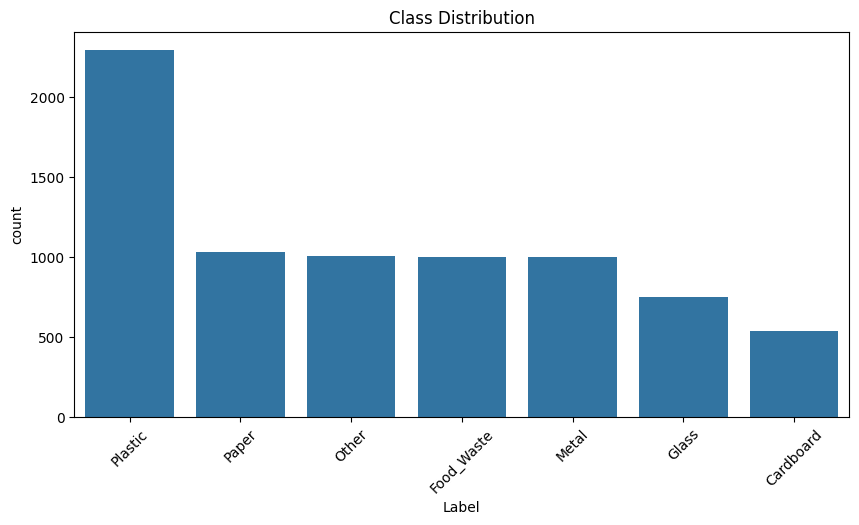

In [ ]:
# 2.2 Data Visualization
# 2.2.1 Class Distribution
label_df = pd.DataFrame({'Label': all_labels})
plt.figure(figsize=(10, 5))
sns.countplot(data=label_df, x='Label', order=label_df['Label'].value_counts().index)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

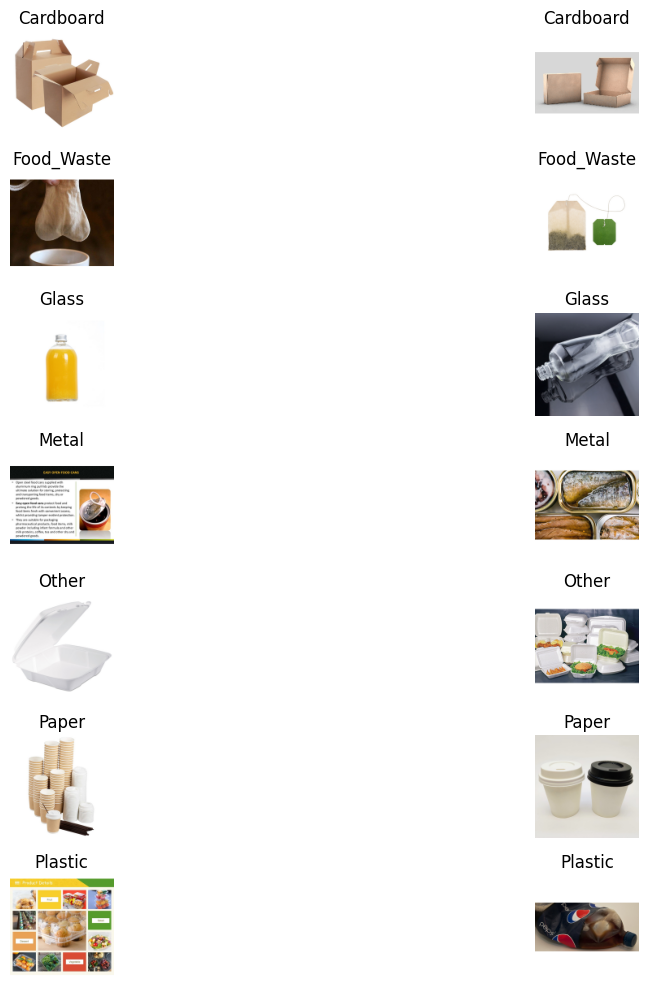

In [ ]:
# 2.2.2 Sample Images
plt.figure(figsize=(15, 10))
samples_per_class = 2
class_names = sorted(set(all_labels))
i = 1
for lbl in class_names:
    idxs = [j for j, x in enumerate(all_labels) if x == lbl][:samples_per_class]
    for idx in idxs:
        plt.subplot(len(class_names), samples_per_class, i)
        plt.imshow(all_images[idx].numpy().astype('uint8'))
        plt.title(lbl)
        plt.axis('off')
        i += 1
plt.tight_layout()
plt.show()

In [ ]:
# 2.3 Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(all_labels)
print('Classes:', le.classes_)


Classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


In [ ]:
# 2.4 Prepare feature array X and label array y, then split
import numpy as np
# Import numpy and assign it to the alias 'np'
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder
import tensorflow as tf # Import tensorflow here

# Define categories
categories = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

#Load images and labels
def load_images_from_folder(folder_name, img_size=(128, 128)):
    images, labels = [], []
    folder_path = os.path.join("data", folder_name)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.resize(img, img_size)
        images.append(img)
        labels.append(folder_name)
    return images, labels
all_images, all_labels = [], [] # Initialize all_images and all_labels here
for cat in categories:
    imgs, lbls = load_images_from_folder(cat)
    all_images.extend(imgs)
    all_labels.extend(lbls)
print(f"Loaded {len(all_images)} images.")

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(all_labels)

eps = 1e-7
X = np.stack([img.numpy() for img in all_images]) / 255.0  # normalize to [0,1]
y = np.array(y_encoded).astype('int32')

Loaded 7625 images.


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split # Import train_test_split here
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print('Train:', X_train.shape, y_train.dtype)
print('Val:  ', X_val.shape, y_val.dtype)


Train: (6100, 128, 128, 3) int32
Val:   (1525, 128, 128, 3) int32


# **3. Model Building and Evaluation**

In [ ]:
# 3. Model Building and Evaluation
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [ ]:
# 3.1 Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)), BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)), BatchNormalization(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)), BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'), Dropout(0.5),
    Dense(len(categories), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# 3.2 Training the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.2592 - loss: 4.6505 - val_accuracy: 0.2557 - val_loss: 2.3902
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.3044 - loss: 2.2168 - val_accuracy: 0.3016 - val_loss: 1.9361
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.3352 - loss: 1.7793 - val_accuracy: 0.3161 - val_loss: 1.7602
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.3323 - loss: 1.6910 - val_accuracy: 0.3344 - val_loss: 1.6835
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.3500 - loss: 1.6734 - val_accuracy: 0.3548 - val_loss: 1.7228
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.3591 - loss: 1.6163 - val_accuracy: 0.3554 - val_loss: 2.1150
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.3855 - loss: 1.5734 - val_accuracy: 0.3462 - val_loss: 1.7052
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.3807 - loss: 1.5709 - val_accu

In [ ]:
# 3.3 Evaluation
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 294ms/step - accuracy: 0.4191 - loss: 1.6062
Validation Loss: 1.6237
Validation Accuracy: 0.4184


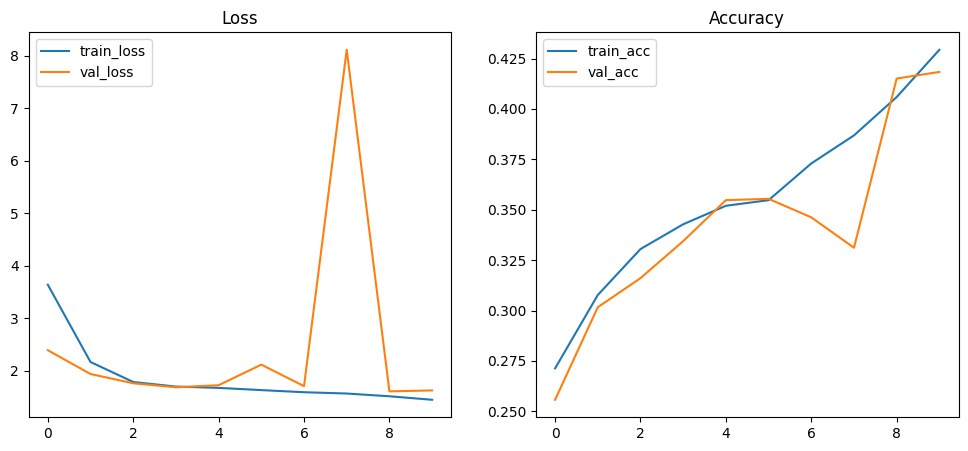

In [ ]:
# 4. Plot training curves
import matplotlib.pyplot as plt # Import matplotlib here
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()

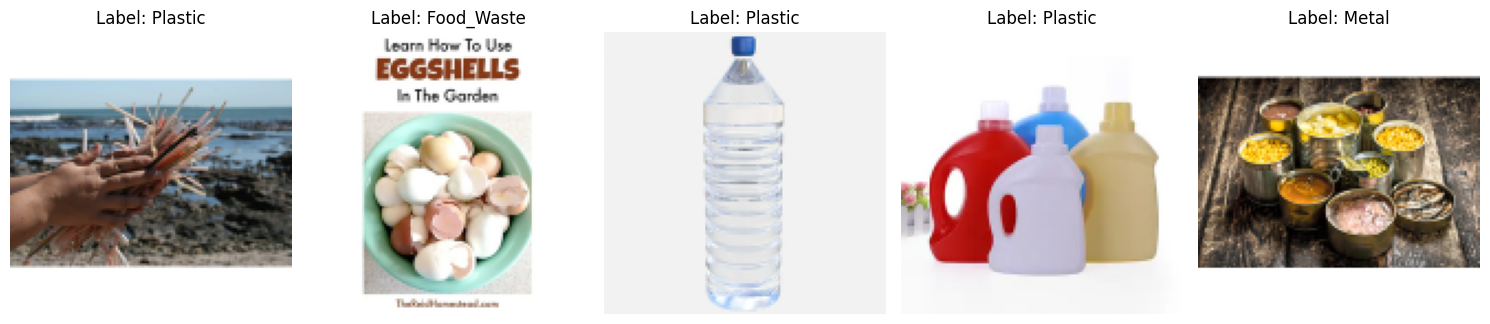

In [ ]:
# 5. Show sample predictions
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {le.inverse_transform([y_train[i]])[0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# **Conclusions**

In [ ]:
# • The dataset contains 7 waste classes with a balanced distribution across categories.
# • The CNN model with 3 convolutional layers achieved a validation accuracy of {val_acc:.4f}.
# • Training and validation loss curves show whether the model is overfitting or underfitting.
# • Further improvements could include data augmentation, hyperparameter tuning, or using a deeper architecture.
# • Overall, this model demonstrates the feasibility of automated waste segregation using CNNs.
